**Часть 1.**

**1** SELECT * FROM titles

WHERE premiered < 2018

ORDER BY premiered DESC

**2** SELECT title, votes FROM titles 

JOIN rating ON titles.title_id = rating.title_id

ORDER BY votes DESC

LIMIT 50

**3** SELECT title, genre_name, rating, votes FROM titles

JOIN film_genres ON titles.title_id = film_genres.title_id

JOIN genre_types ON film_genres.genre_id = genre_types.id

JOIN rating ON titles.title_id = rating.title_id

WHERE genre_name = "Comedy" AND rating >= 7 AND premiered = 2019

ORDER BY votes DESC

LIMIT 10

**4** SELECT title, premiered, name FROM titles

JOIN crew ON titles.title_id = crew.title_id

JOIN people ON crew.person_id = people.person_id

WHERE name = "Emma Watson"

ORDER BY premiered DESC

**5** SELECT premiered, genre_name, COUNT(titles.title_id) as n_films FROM titles

JOIN film_genres ON titles.title_id = film_genres.title_id

JOIN genre_types ON film_genres.genre_id = genre_types.id

WHERE genre_name = "Crime"

GROUP BY premiered

ORDER BY premiered

**6 a** SELECT name, born, died, role_type, (IFNULL(died, 2021) - born) AS lived FROM people

JOIN crew ON crew.person_id = people.person_id

JOIN role_categories ON crew.category = role_categories.id

WHERE born > 0 AND (category IN (1, 2))

ORDER BY lived DESC

LIMIT 10

**6 b** SELECT name, born, died, role_type, (IFNULL(died, 2021) - born) AS lived FROM people

JOIN crew ON crew.person_id = people.person_id

JOIN role_categories ON crew.category = role_categories.id

WHERE born > 0 AND (category IN (1, 2)) AND lived > 100

ORDER BY lived DESC

**7**

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect('D:\imdb_small_indexed.db')
cur = con.cursor()

In [3]:
comedies_query = """
SELECT title, genre_name, ROUND(rating) as comedy_notes
FROM titles 
JOIN film_genres ON titles.title_id = film_genres.title_id
JOIN genre_types ON film_genres.genre_id = genre_types.id
JOIN rating ON titles.title_id = rating.title_id
WHERE genre_name = "Comedy"
ORDER BY comedy_notes DESC
"""

In [4]:
cur.execute(comedies_query)
df_comedies = pd.read_sql_query(comedies_query, con=con)
df_comedies

,title,genre_name,comedy_notes
0,Kollege kommt gleich,Comedy,10.0
1,Call Me Kevin,Comedy,10.0
2,"That's My Chair, That Is",Comedy,10.0
3,Tromasterpiece Theatre: Poultrygeist,Comedy,10.0
4,Brooklyn Vans,Comedy,10.0
...,...,...,...
88243,Gemelos sin cura,Comedy,1.0
88244,Bocadillo,Comedy,1.0
88245,Debt Fees,Comedy,1.0
88246,Awang Gerudi,Comedy,1.0


In [6]:
dramas_query = """
SELECT title, genre_name, ROUND(rating) as drama_notes
FROM titles 
JOIN film_genres ON titles.title_id = film_genres.title_id
JOIN genre_types ON film_genres.genre_id = genre_types.id
JOIN rating ON titles.title_id = rating.title_id
WHERE genre_name = "Drama"
ORDER BY drama_notes DESC
"""

In [7]:
cur.execute(dramas_query)
df_dramas = pd.read_sql_query(dramas_query, con=con)
df_dramas

,title,genre_name,drama_notes
0,Dhyanu Bhagat,Drama,10.0
1,Malgudi Days,Drama,10.0
2,Pitchi Pullaiah,Drama,10.0
3,Aval Kathirunnu Avanum,Drama,10.0
4,König Richard III,Drama,10.0
...,...,...,...
133666,Alibi,Drama,1.0
133667,Hanum & Rangga,Drama,1.0
133668,Schaste Napolovinu,Drama,1.0
133669,Second First Love,Drama,1.0


In [8]:
df_comedies_points = df_comedies.groupby("comedy_notes")["comedy_notes"].count()
df_comedies_points

comedy_notes
1.0       138
2.0       717
3.0      2478
4.0      6503
5.0     14546
6.0     25271
7.0     24277
8.0     12327
9.0      1895
10.0       96
Name: comedy_notes, dtype: int64

In [9]:
df_dramas_points = df_dramas.groupby("drama_notes")["drama_notes"].count()
df_dramas_points

drama_notes
1.0       140
2.0       591
3.0      2042
4.0      6324
5.0     17572
6.0     39241
7.0     46006
8.0     18556
9.0      3106
10.0       93
Name: drama_notes, dtype: int64

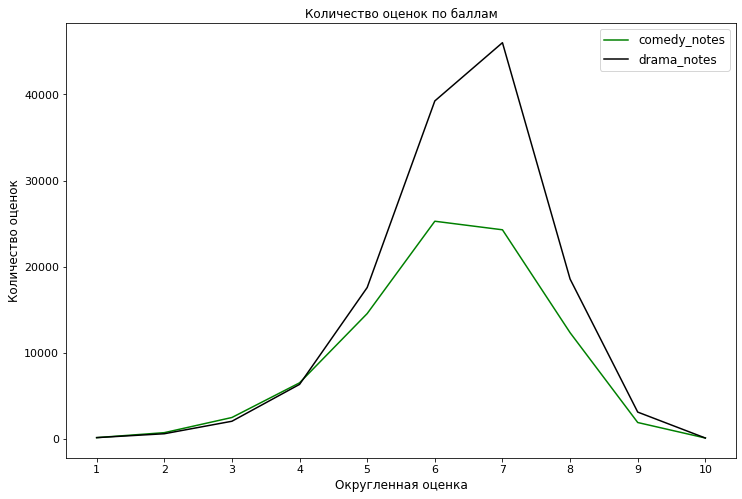

In [21]:
plt.figure(figsize=(12, 8))
plt.xticks(range(1, 11))
plt.title("Количество оценок по баллам", fontsize = 12)
plt.xlabel("Округленная оценка", fontsize = 12)
plt.ylabel("Количество оценок", fontsize = 12)
ax = plt.gca()
df_comedies["comedy_notes"].value_counts().sort_index().plot(kind='line', ax=ax, fontsize = 11, color = 'green')
df_dramas["drama_notes"].value_counts().sort_index().plot(kind='line', ax=ax, fontsize = 11, color = 'black')
ax.legend(loc='best', fontsize = 12)
plt.show()

Сохранение в базу.

CREATE TABLE IF NOT EXISTS longlivers AS

SELECT name, born, died, role_type, (IFNULL(died, 2021) - born) AS lived FROM people

JOIN crew ON crew.person_id = people.person_id

JOIN role_categories ON crew.category = role_categories.id

WHERE born > 0 AND category IN (1, 2)

ORDER BY lived DESC